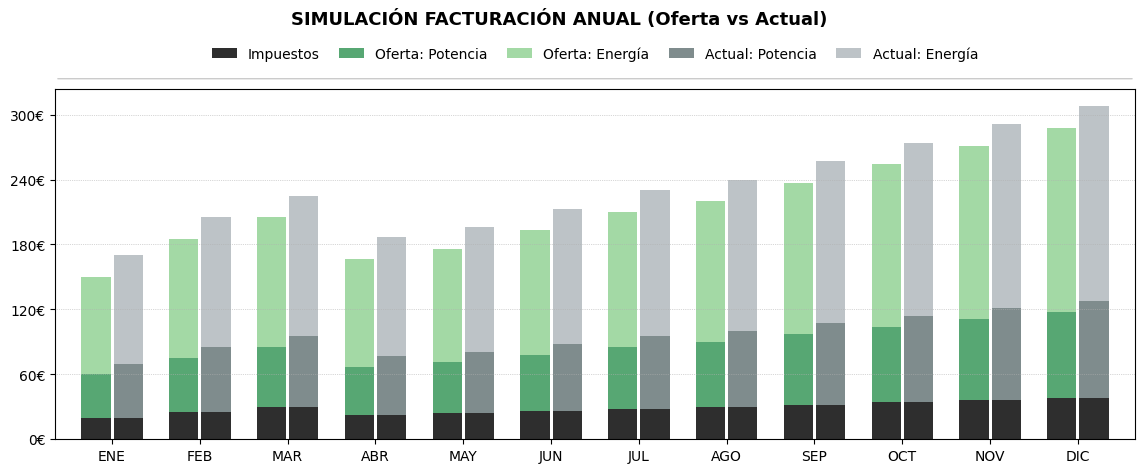

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

# ---------------------------
# DATOS (ejemplo; sustituye por los tuyos)
# ---------------------------
meses = ["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]

ener_actual = [100, 120, 130, 110, 115, 125, 135, 140, 150, 160, 170, 180]
pot_actual  = [50,  60,  65,  55,  57,  62,  67,  70,  75,  80,  85,  90]
ener_oferta = [90, 110, 120, 100, 105, 115, 125, 130, 140, 150, 160, 170]
pot_oferta  = [40,  50,  55,  45,  47,  52,  57,  60,  65,  70,  75,  80]
impuestos   = [20,  25,  30,  22,  24,  26,  28,  30,  32,  34,  36,  38]

# Paleta: Actual más apagado; Oferta suave/llamativa; Impuestos igual
colores = {
    "impuestos":  "#2E2E2E",
    "ener_actual":"#BDC3C7",
    "pot_actual":  "#7F8C8D",
    "ener_oferta":"#A3D9A5",
    "pot_oferta":  "#57A773",
}

# ---------------------------
# ESPACIADO
# ---------------------------
width = 0.50       # ancho de cada barra (izq o der)
gap = 0.05         # hueco fino entre barras del mismo mes (izq vs der)
group_space = 1.50 # separación ENTRE meses (centro a centro)

# Centros de cada "mes"
x = np.arange(len(meses)) * group_space
left_x  = x - (width/2 + gap/2)   # Oferta (izquierda)
right_x = x + (width/2 + gap/2)   # Actual (derecha)

# Series a numpy para apilar con 'bottom'
imp = np.array(impuestos)
po  = np.array(pot_oferta)
eo  = np.array(ener_oferta)
pa  = np.array(pot_actual)
ea  = np.array(ener_actual)

# ---------------------------
# GRÁFICO
# ---------------------------
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=False)

# --- BARRA IZQUIERDA (OFERTA) ---
ax.bar(left_x, imp, width=width, label="Impuestos",            color=colores["impuestos"])
ax.bar(left_x, po,  width=width, bottom=imp,                   label="Oferta: Potencia", color=colores["pot_oferta"])
ax.bar(left_x, eo,  width=width, bottom=imp+po,                label="Oferta: Energía",  color=colores["ener_oferta"])

# --- BARRA DERECHA (ACTUAL) ---
ax.bar(right_x, imp, width=width, color=colores["impuestos"],  label="_nolegend_")
ax.bar(right_x, pa,  width=width, bottom=imp,                  label="Actual: Potencia", color=colores["pot_actual"])
ax.bar(right_x, ea,  width=width, bottom=imp+pa,               label="Actual: Energía",  color=colores["ener_actual"])

# ======= TÍTULO, LÍNEA Y LEYENDA FUERA DEL CUADRO =======
fig.suptitle("SIMULACIÓN FACTURACIÓN ANUAL (Oferta vs Actual)", y=0.98, fontsize=13, fontweight="bold")

# Línea separadora bajo el título (fuera del área del eje)
line_y = 1.03  # >1.0 => por encima del área del eje
ax.annotate(
    "", xy=(0, line_y), xytext=(1, line_y),
    xycoords="axes fraction", textcoords="axes fraction",
    arrowprops=dict(arrowstyle="-", lw=0.8, color="#BDBDBD")
)

# LEYENDA EN UNA SOLA LÍNEA
legend_y = 1.065
ax.legend(
    ncol=5,                      # todos los ítems en una fila
    loc="lower center",
    bbox_to_anchor=(0.5, legend_y),
    frameon=False,
    borderaxespad=0.0,
    columnspacing=1.4,
    handlelength=1.8,
    fontsize=10
)

# ======= Ejes y estética =======
ax.set_xticks(x)
ax.set_xticklabels(meses)
# Sin etiqueta de eje Y (ylabel)
# ax.set_ylabel("€ por mes")

# Eje Y autoescalado + formateo "n€"
ax.yaxis.set_major_locator(MaxNLocator(nbins=6, integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(round(v))}€"))

ax.grid(axis="y", linestyle=":", linewidth=0.5)

# ====== LÍMITES CON MARGEN IGUAL AL HUECO ENTRE MESES ======
# Margen externo igual al gap entre grupos
left_limit  = x[0]  - group_space + width + gap/2
right_limit = x[-1] + group_space - width - gap/2
ax.set_xlim(left_limit, right_limit)

# ===== Márgenes FIJOS (sin tight_layout) =====
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.12, top=0.82)

plt.show()
